In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import fmin
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('./data/ex2data2.txt', sep=',', names=['x1', 'x2', 'y'])
df.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [15]:
X = df.drop(columns=['y'])
y = df['y']

In [18]:
df.loc[df['y'] == 1, 'x1']

0     0.051267
1    -0.092742
2    -0.213710
3    -0.375000
4    -0.513250
5    -0.524770
6    -0.398040
7    -0.305880
8     0.016705
9     0.131910
10    0.385370
11    0.529380
12    0.638820
13    0.736750
14    0.546660
15    0.322000
16    0.166470
17   -0.046659
18   -0.173390
19   -0.478690
20   -0.605410
21   -0.628460
22   -0.593890
23   -0.421080
24   -0.115780
25    0.201040
26    0.466010
27    0.673390
28   -0.138820
29   -0.294350
30   -0.265550
31   -0.161870
32   -0.173390
33   -0.282830
34   -0.363480
35   -0.300120
36   -0.236750
37   -0.063940
38    0.062788
39    0.229840
40    0.293200
41    0.483290
42    0.644590
43    0.460250
44    0.627300
45    0.575460
46    0.725230
47    0.224080
48    0.442970
49    0.322000
50    0.137670
51   -0.006336
52   -0.092742
53   -0.207950
54   -0.207950
55   -0.438360
56   -0.219470
57   -0.138820
Name: x1, dtype: float64

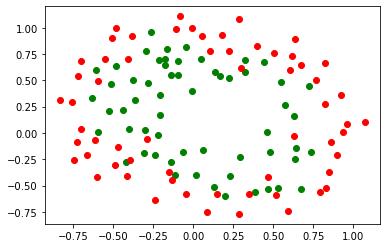

In [23]:
plt.scatter(df.loc[df['y'] == 1, 'x1'], df.loc[df['y'] == 1, 'x2'], c='g')
plt.scatter(df.loc[df['y'] == 0, 'x1'], df.loc[df['y'] == 0, 'x2'], c='r')

In [27]:
def sigmoid(z):
    return (1 / (1 + np.power(np.e, -z)))

In [25]:
def h_of_theta(theta, x):
    return sigmoid(np.dot(theta.T, x))

In [39]:
# let's generate additional features by maping the features into
# all polynomial terms of x1 and x2 up to the sixth power.
def generate_polinomial(x1, x2, power=6):
    result = []
    for i in range(0, power + 1):
        for j in range(0, power + 1 - i):
            result.append(np.power(x1, i) * np.power(x2, j))

    return result

generate_polinomial(1, 2)

[1,
 2,
 4,
 8,
 16,
 32,
 64,
 1,
 2,
 4,
 8,
 16,
 32,
 1,
 2,
 4,
 8,
 16,
 1,
 2,
 4,
 8,
 1,
 2,
 4,
 1,
 2,
 1]